<a href="https://colab.research.google.com/github/FaldoFajri/SMS-Spam-Collection-Classification/blob/main/SMS_Spam_Collection_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
! pip install nltk spacy scikit-learn

In [11]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Testing

In [12]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Sample text
text = "The cats are running faster than the dogs"

# Tokenization
tokens = word_tokenize(text)
print("Tokens:", tokens)

# Stemming
stemmer = PorterStemmer()
stems = [stemmer.stem(word) for word in tokens]
print("Stems:", stems)

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(word) for word in tokens]
print("Lemmas:", lemmas)

Tokens: ['The', 'cats', 'are', 'running', 'faster', 'than', 'the', 'dogs']
Stems: ['the', 'cat', 'are', 'run', 'faster', 'than', 'the', 'dog']
Lemmas: ['The', 'cat', 'are', 'running', 'faster', 'than', 'the', 'dog']


# SMS Spam Collection

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# 1. Load dataset
df = pd.read_csv('/content/SMSSpamCollection.csv', encoding='latin-1', sep='\t', header=None)
df = df[[0, 1]]
df.columns = ['label', 'text']

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# 3. Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 4. Train model (Naive Bayes)
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# 5. Evaluation
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



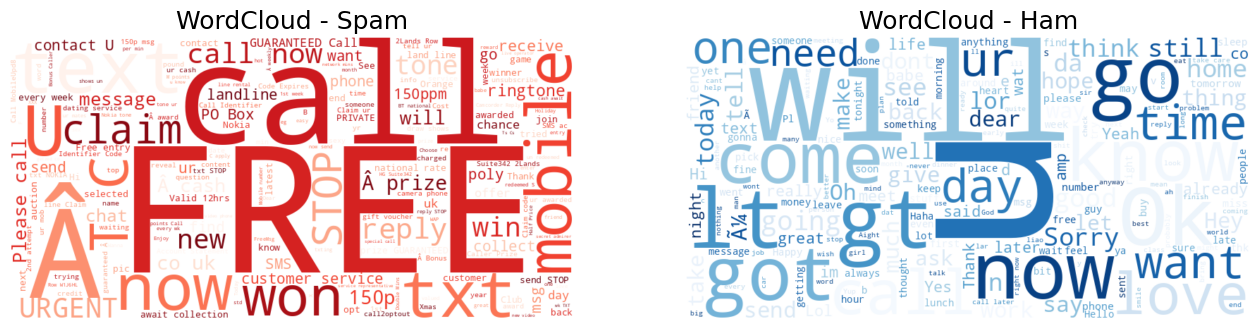

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load dataset
df = pd.read_csv('/content/SMSSpamCollection.csv', encoding='latin-1', sep='\t', header=None)
df.columns = ['label', 'text']

# Pisahkan spam dan ham
spam_text = " ".join(df[df['label'] == 'spam']['text'])
ham_text  = " ".join(df[df['label'] == 'ham']['text'])

# WordCloud Spam
spam_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(spam_text)

# WordCloud Ham
ham_wc = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(ham_text)

# Visualisasi
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.imshow(spam_wc, interpolation='bilinear')
plt.title("WordCloud - Spam", fontsize=18)
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(ham_wc, interpolation='bilinear')
plt.title("WordCloud - Ham", fontsize=18)
plt.axis("off")

plt.show()